In [170]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import psycopg2 as pg

In [171]:
engine = pg.connect("dbname='postgres' user='postgres' host='database-final.cjdbapst3wjf.us-east-1.rds.amazonaws.com' port='5432' password='FinalProject05'")
IC_2013 = pd.read_sql('select * from merged_2013', con=engine)
IC_2013.head()
IC_2013.dropna()

,election,candidateid,candidatename,date,contributiontype,city,state,zipcode,amount,matchamt,prevamt,totalamount,expenditure_amount,purposecode,purpose
0,2013,1752,"Abiodun,Laurel-Smith",2013-09-07,Corporation,New York,NY,10001,0.0,0.0,0.0,0.0,54,Office Expenses,Office Expenses
1,2013,260,"William,Thompson, Jr.",2012-01-17,Corporation,New York,NY,10019,0.0,0.0,0.0,0.0,19,Other,Other: explntion
2,2013,FI,"John,Liu",2013-07-12,Limited Liability Company,Flushing,NY,11355,0.0,0.0,0.0,0.0,110,Office Expenses,Office Expenses
3,2013,FI,"John,Liu",2013-04-15,Limited Liability Company,Flushing,NY,11355,0.0,0.0,0.0,0.0,250,Fundraising,Fundraising
4,2013,260,"William,Thompson, Jr.",2013-07-08,Limited Liability Company,New York,NY,10018,0.0,0.0,0.0,0.0,57,Other,Other: explntion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,2013,FI,"John,Liu",2012-03-23,Other,New York,NY,10036,0.0,0.0,0.0,0.0,17861,Professional Services,Prof. Srvcs.
13165,2013,FI,"John,Liu",2012-04-11,Other,New York,NY,10036,0.0,0.0,0.0,0.0,23053,Professional Services,Prof. Srvcs.
13166,2013,FI,"John,Liu",2012-05-03,Other,New York,NY,10036,0.0,0.0,0.0,0.0,14896,Professional Services,Prof. Srvcs.
13167,2013,FI,"John,Liu",2013-01-02,Other,New York,NY,10036,0.0,0.0,0.0,0.0,50000,Professional Services,Prof. Srvcs.


In [172]:
IC_2013_df = IC_2013.drop(columns=['election','prevamt'])
total_groupby = IC_2013_df.groupby(['candidatename']).sum(['totalamount']).sort_values('totalamount',ascending=False)
total_groupby

,amount,matchamt,totalamount,expenditure_amount
candidatename,,,,
"de Blasio, Bill",11073226.59,926504.0,1.497036e+07,0
"Quinn, Christine C",6096021.97,527421.0,9.427039e+06,0
"Thompson, Jr., William C",4911412.70,417722.0,6.111452e+06,0
"Liu, John C",239200.00,0.0,4.045000e+05,0
"Weiner, Anthony D",225088.74,0.0,2.301887e+05,0
"Lhota, Joseph J",41414.00,0.0,4.141400e+04,0
"Albanese, Sal F",27178.00,0.0,3.092800e+04,0
"Hidary, Jack D",1500.00,0.0,2.500000e+03,0
"Salgado, Erick J",675.00,0.0,6.750000e+02,0


In [173]:
IC_2013_df = IC_2013_df.groupby(['zipcode','date','contributiontype','city','state']).sum('totalamount')

In [174]:
IC_2013_df.head()

amount  matchamt  \
zipcode date       contributiontype city     state                     
00901   2012-01-17 Corporation      San Juan PR        0.0       0.0   
00907   2011-10-24 Corporation      San Juan PR        0.0       0.0   
        2011-11-14 Corporation      San Juan PR        0.0       0.0   
        2013-11-07 Corporation      San Juan PR        0.0       0.0   
        2013-12-11 Corporation      San Juan PR        0.0       0.0   

                                                    totalamount  \
zipcode date       contributiontype city     state                
00901   2012-01-17 Corporation      San Juan PR             0.0   
00907   2011-10-24 Corporation      San Juan PR             0.0   
        2011-11-14 Corporation      San Juan PR             0.0   
        2013-11-07 Corporation      San Juan PR             0.0   
        2013-12-11 Corporation      San Juan PR             0.0   

                                                    expenditure_amount  
zipcode date       contributiontype city     state                      
00901   2012-01-17 Corporation      San Juan PR                    644  
00907   2011-10-24 Corporation      San Juan PR                    186  
        2011-11-14 Corporation      San Juan PR                    188  
        2013-11-07 Corporation      San Juan PR                   1281  
        2013-12-11 Corporation      San Juan PR                   -256

In [175]:
IC_2013_df = IC_2013_df.reset_index()
IC_2013_df

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,00901,2012-01-17,Corporation,San Juan,PR,0.0,0.0,0.0,644
1,00907,2011-10-24,Corporation,San Juan,PR,0.0,0.0,0.0,186
2,00907,2011-11-14,Corporation,San Juan,PR,0.0,0.0,0.0,188
3,00907,2013-11-07,Corporation,San Juan,PR,0.0,0.0,0.0,1281
4,00907,2013-12-11,Corporation,San Juan,PR,0.0,0.0,0.0,-256
...,...,...,...,...,...,...,...,...,...
29205,M6K3C,2013-09-04,Corporation,Toronto,ON,0.0,0.0,0.0,29
29206,M6K3C,2013-10-04,Corporation,Toronto,ON,0.0,0.0,0.0,29
29207,M6K3C,2013-11-04,Corporation,Toronto,ON,0.0,0.0,0.0,29
29208,M6K3C,2013-12-03,Corporation,Toronto,ON,0.0,0.0,0.0,29


In [176]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
IC_2013_df_enc = IC_2013_df.copy()
le = LabelEncoder()
IC_2013_df_enc['date'] = le.fit_transform(IC_2013_df['date'])
IC_2013_df_enc['contributiontype'] = le.fit_transform(IC_2013_df['contributiontype'])
IC_2013_df_enc['city'] = le.fit_transform(IC_2013_df['city'])
# IC_2013_df_enc['Amount'] = le.fit_transform(IC_2013_df['Amount'])
IC_2013_df_enc['state'] = le.fit_transform(IC_2013_df['state'])
IC_2013_df_enc['zipcode'] = le.fit_transform(IC_2013_df['zipcode'])
# IC_2013_df_enc['MatchAmt'] = le.fit_transform(IC_2013_df['MatchAmt'])
# IC_2013_df_enc[features] = scaler.fit_transform(IC_2013_df_enc[features])
IC_2013_df_enc.head()

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,0,763,4,1576,60,0.0,0.0,0.0,644
1,1,683,4,1576,60,0.0,0.0,0.0,186
2,1,703,4,1576,60,0.0,0.0,0.0,188
3,1,1402,4,1576,60,0.0,0.0,0.0,1281
4,1,1428,4,1576,60,0.0,0.0,0.0,-256


In [177]:

X = IC_2013_df_enc.drop('totalamount',axis = 1)
y = IC_2013_df_enc['totalamount']
IC_2013_df_enc.nunique()

zipcode               2516
date                  1450
contributiontype        12
city                  2015
state                   90
amount                 919
matchamt               286
totalamount           1274
expenditure_amount    2239
dtype: int64

In [178]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=79)

In [179]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [180]:
regr = RandomForestRegressor()

In [181]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [182]:
y_pred = regr.predict(X_test)
print(len(y_pred))

8763


In [183]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

0.8637442695345169


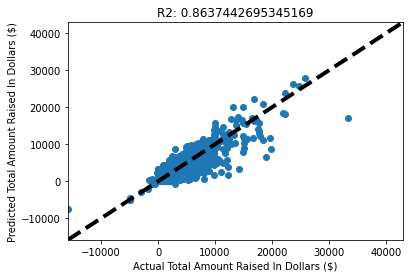

In [184]:
# %matplotlib inline
print(r_squared)
# fig, ax = plt.subplots()
# ax.scatter(y_test,y_pred)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Actual Total Amount Raised In Dollars ($)')
# ax.set_ylabel('Predicted Total Amount Raised In Dollars ($)')
# ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.scatter(y_test,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Total Amount Raised In Dollars ($)')
plt.ylabel('Predicted Total Amount Raised In Dollars ($)')
plt.title('R2: ' + str(r2_score(y_test, y_pred)))
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.savefig('..ResourcesPredicted_Total_Amount_Regression.png')

In [185]:
pred_df = X_test
pred_df['Predicted Total Amount'] = y_pred
# pred_df.groupby('ZipCode').sum('Predicted Total Amount').head()

/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [186]:
pred_df.isnull().sum()

zipcode                   0
date                      0
contributiontype          0
city                      0
state                     0
amount                    0
matchamt                  0
expenditure_amount        0
Predicted Total Amount    0
dtype: int64

In [187]:
pred_graph = pred_df.groupby('zipcode').sum('redicted Total Amount').sort_values(by=['Predicted Total Amount'],ascending=True)

In [188]:
# pred_graph = pred_graph.reset_index()
pred_graph

,date,contributiontype,city,state,amount,matchamt,expenditure_amount,Predicted Total Amount
zipcode,,,,,,,,
1017,1165,10,1352,100,-4650.00,0.0,0,-4702.000000
752,4702,35,13825,350,-3460.00,0.0,0,-2915.790200
674,10827,52,2070,500,-2925.00,550.0,920,-2353.090000
1,703,4,1576,60,0.00,0.0,188,0.000000
2514,4094,12,5349,171,0.00,0.0,87,0.000000
...,...,...,...,...,...,...,...,...
825,153037,717,32754,7350,146371.00,24905.0,165958,218134.031401
549,153628,902,204587,8400,143334.00,21019.0,17145,247464.979799
562,102196,536,131544,5400,187023.00,19435.0,41428,274038.195500


In [189]:
pred_graph.to_csv('../Resources/Predicted_Amounts.csv',index=False)